# Special events alcohol licenses
The code reads a CSV file named GeocodeResults3.csv with a specified encoding (ISO-8859-1) and skips any lines that are not formatted correctly. It then sorts the DataFrame by the _ID column in ascending order and saves the sorted DataFrame as GeocodeResults-_sorted.csv. 

Key actions:
Reads data from 'GeocodeResults3.csv'.
Sorts the data by _ID in ascending order.
Saves the sorted data into a new CSV file 'GeocodeResults-_sorted.csv'.
Prints a confirmation message once the file is saved.

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('GeocodeResults3.csv', encoding='ISO-8859-1', on_bad_lines='skip')

# Sort the DataFrame by the '_ID' column in ascending order
df_sorted = df.sort_values(by='_ID', ascending=True)

# Save the sorted DataFrame back to a CSV file
df_sorted.to_csv('GeocodeResults-_sorted.csv', index=False)

# Print message to confirm the file is saved
print("File sorted and saved as 'GeocodeResults3_sorted.csv'")


File sorted and saved as 'GeocodeResults3_sorted.csv'


This code performs the following steps:

Loads two CSV files:
GeocodeResults-_sorted.csv into df_geocode
special_event_alcohol_licenses.csv into df_license
Displays the first few rows of both DataFrames to examine their structure using head().
Adds the 'Census Tract' column from df_geocode to df_license.
Saves the updated DataFrame as special_event_alcohol_licenses_updated.csv.

In [2]:
import pandas as pd

# Load the sorted GeocodeResults file
df_geocode = pd.read_csv('GeocodeResults-_sorted.csv', encoding='ISO-8859-1', on_bad_lines='skip')

# Load the Special Event Alcohol Licenses file
df_license = pd.read_csv('special_event_alcohol_licenses.csv', encoding='ISO-8859-1', on_bad_lines='skip')

# Check the first few rows of both DataFrames to understand the structure
print(df_geocode.head())
print(df_license.head())

# Assuming you want to add the 'Census Tract' column from the GeocodeResults file
df_license['Census Tract'] = df_geocode['Census Tract']

# Save the updated DataFrame to a new CSV file
df_license.to_csv('special_event_alcohol_licenses_updated.csv', index=False)

# Print confirmation
print("Column 'Census Tract' added and saved to 'special_event_alcohol_licenses_updated.csv'")


   _ID                                            Address  Match  Exact  \
0    1  100 William T Morrissey BL, Dorchester, MA, 02125  Match  Exact   
1    2                  32 Atlantic AV, Boston, MA, 02110  Match  Exact   
2    3                  184 Dudley ST, Roxbury, MA, 02119  Match  Exact   
3    4             665 Commonwealth AV, Boston, MA, 02215  Match  Exact   
4    5               8 Saint Mary's ST, Boston, MA, 02215  Match  Exact   

                                            Address2  \
0  100 WILLIAM T MORRISSEY BLVD, DORCHESTER, MA, ...   
1                 32 ATLANTIC AVE, BOSTON, MA, 02110   
2                  184 DUDLEY ST, ROXBURY, MA, 02119   
3            665 COMMONWEALTH AVE, BOSTON, MA, 02215   
4                   8 ST MARYS ST, BOSTON, MA, 02215   

            Latitude and Longiitude  Census Tract  
0  -71.046835546128,42.314135433039       90901.0  
1  -71.050927045807,42.362518656296       30301.0  
2   -71.082124465659,42.32860065599       80401.0  
3  -

In [3]:
!pip install geopy


In [4]:
import pandas as pd

# Read the file from the current working directory
file_path = "special_event_alcohol_licenses_updated.csv"
df = pd.read_csv(file_path)

# Get the column names
columns = df.columns
print(columns)


Index(['ï»¿_id', 'license_num', 'historicallicensenum', 'license_type',
       'issued', 'expires', 'business_name', 'dba_name', 'comments',
       'location_comments', 'opening', 'closing', 'patronsout', 'capacity',
       'applicant', 'manager', 'day_phone', 'evening_phone', 'address', 'city',
       'state', 'zip', 'gpsx', 'gpsy', 'Census Tract'],
      dtype='object')


In [5]:
alcohol_licenses_df = pd.read_csv('cleaned_data.csv')

census_tracts_list = [
    '080601', '010403', '070700', '010300', '981100',
    '120201', '980300', '010404', '010405', '080100',
    '120301', '071101', '091300', '010500', '110105',
    '010206', '081301', '081302', '070502', '082100',
    '010600', '070600', '080300', '080401', '080500',
    '080801', '080900', '081400', '081500', '081700',
    '081800', '081900', '082000', '090100', '090200',
    '090300', '090400', '090600', '090700', '091400',
    '092400', '070902', '070802', '070801', '070901'
]

df_D7 = alcohol_licenses_df[alcohol_licenses_df['census tract'].astype(str).isin(census_tracts_list)]
df_D7.head()

,_id,license_num,historicallicensenum,license_type,issued,expires,business_name,dba_name,comments,location_comments,...,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy,census tract
1,3.0,LBS-581324,NaN,Special 1-Day Malt Wine,11/18/24,11/21/24,NaN,NaN,NaN,NaN,...,Haris Lefteri,(617)849-6324,NaN,184 Dudley ST,Roxbury,MA,02119,769172.000000,2.945090e+06,080401
35,39.0,LBS-577386,NaN,Special 1-Day Malt Wine,10/31/24,12/3/24,NaN,NaN,NaN,NaN,...,DAVID CARON,(617)989-2000,NaN,1 FRANKLIN PARK,Dorchester,MA,02125,0.000000,0.000000e+00,090700
43,47.0,LBS-580188,NaN,Special 1-Day All Alcohol,10/31/24,12/22/24,NaN,NaN,NaN,NaN,...,Meg O'Brien,(617)273-1576,NaN,264 Huntington AV,Boston,MA,02115,768202.169562,2.949866e+06,010405
44,48.0,LBS-580208,NaN,Special 1-Day Malt Wine,10/31/24,11/25/24,NaN,NaN,NaN,NaN,...,Chris Sottile,NaN,(617)432-7070,77 Avenue Louis Pasteur,Boston,MA,02115,763558.214611,2.948606e+06,010300
47,51.0,LBS-577388,NaN,Special 1-Day Malt Wine,10/24/24,10/26/24,NaN,NaN,NaN,NaN,...,Carolina Baez,NaN,NaN,590 Shawmut AV,Roxbury,MA,02118,769784.391463,2.947704e+06,080500


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data file
data = pd.read_csv('cleaned_data.csv')

# Display the first few rows
print(data.head())

# Get an overview of the dataset
print(data.info())


   _id license_num  historicallicensenum             license_type    issued  \
0  2.0  LBS-581869                   NaN  Special 1-Day Malt Wine  11/18/24   
1  3.0  LBS-581324                   NaN  Special 1-Day Malt Wine  11/18/24   
2  4.0  LBS-581335                   NaN  Special 1-Day Malt Wine  11/15/24   
3  5.0  LBS-581446                   NaN  Special 1-Day Malt Wine  11/15/24   
4  6.0  LBS-581485                   NaN  Special 1-Day Malt Wine  11/15/24   

    expires business_name dba_name comments location_comments  ...  \
0   12/5/24           NaN      NaN      NaN               NaN  ...   
1  11/21/24           NaN      NaN      NaN               NaN  ...   
2  12/11/24           NaN      NaN      NaN               NaN  ...   
3  12/13/24           NaN      NaN      NaN        Colloquium  ...   
4  11/18/24           NaN      NaN      NaN               NaN  ...   

             manager      day_phone  evening_phone              address  \
0      James Tipping         

This code performs the following steps:

Converts the 'issued' column to a datetime format using pd.to_datetime(). Invalid or missing dates are coerced to NaT (Not a Time).
Extracts the year from the 'issued' column into a new column year.
Groups the data by the year column and counts the number of licenses issued each year using .groupby() and .size().
Plots a bar chart showing the trend of licenses issued over time

/var/folders/p1/2ml0fv9x7x79s1nnddt1_10h0000gn/T/ipykernel_6142/601781826.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issued'] = pd.to_datetime(data['issued'], errors='coerce')


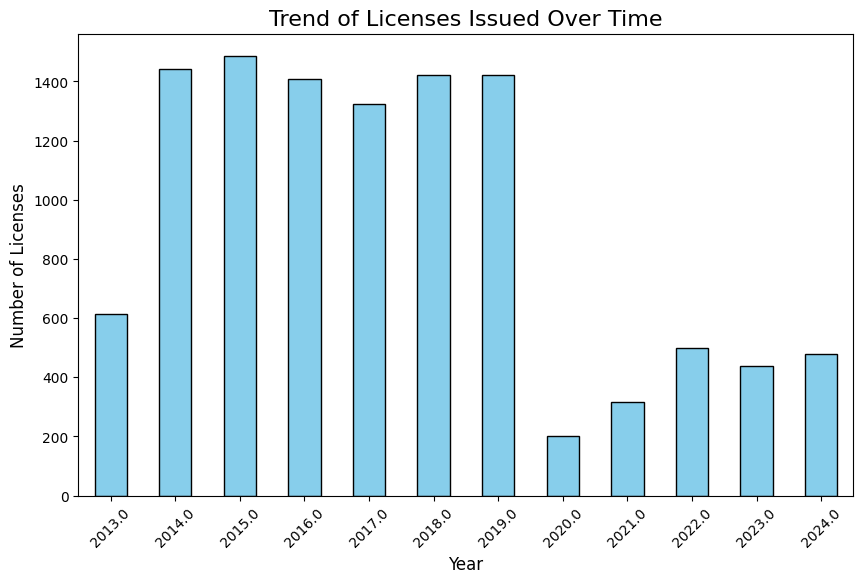

In [8]:
# Convert 'issued' column to datetime
data['issued'] = pd.to_datetime(data['issued'], errors='coerce')

# Extract year and count licenses per year
data['year'] = data['issued'].dt.year
licenses_by_year = data.groupby('year').size()

# Plot the trend of licenses issued
plt.figure(figsize=(10, 6))
licenses_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Trend of Licenses Issued Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Licenses', fontsize=12)
plt.xticks(rotation=45)
plt.show()


This code performs the following steps:

Checks unique license types: The code prints the unique values found in the license_type column to understand the different categories of licenses present in the data.
Plots the distribution of license types:
The value_counts() function is used to count the occurrences of each unique license type.
A bar plot is created with sns.barplot() where:
The x-axis represents the unique license types.
The y-axis shows the count of each license type.
The viridis color palette is used for styling the bars.

['Special 1-Day Malt Wine' 'Special 1-Day All Alcohol'
 'Charity Auction/Wine Tasting' nan]


/var/folders/p1/2ml0fv9x7x79s1nnddt1_10h0000gn/T/ipykernel_6142/2234254572.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=license_type_count.index, y=license_type_count.values, palette='viridis')


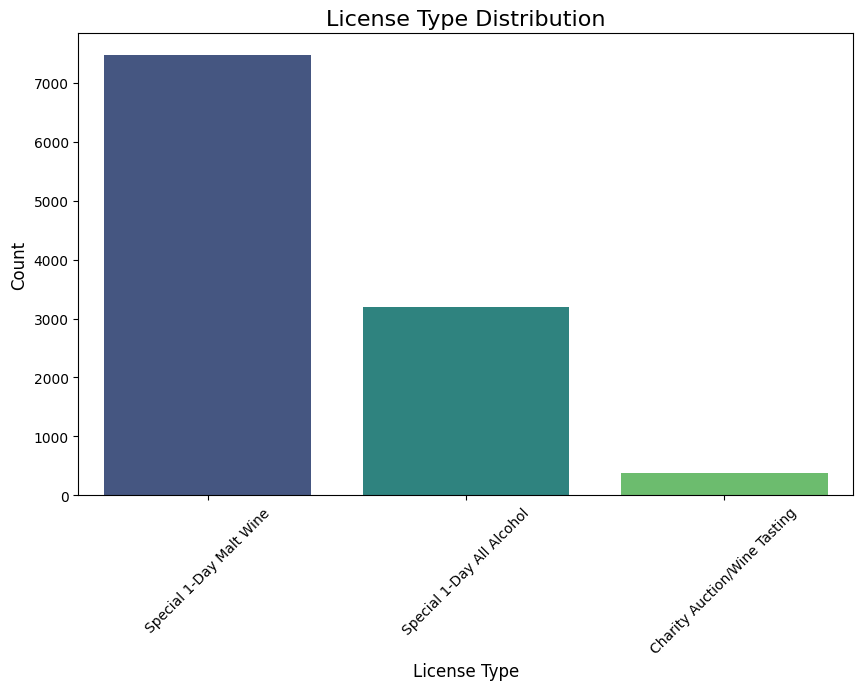

In [9]:
# Check unique license types
print(data['license_type'].unique())

# Plot the distribution of license types
license_type_count = data['license_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=license_type_count.index, y=license_type_count.values, palette='viridis')
plt.title('License Type Distribution', fontsize=16)
plt.xlabel('License Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


This code identifies and visualizes the top 10 most frequent businesses that applied for special event licenses:

Identifies the top 10 businesses:
The value_counts() function counts the occurrences of each unique business_name.
head(10) retrieves the top 10 businesses with the highest counts.
Plots the top 10 businesses:
A horizontal bar plot is created using sns.barplot() where:
The x-axis represents the count of each business.
The y-axis shows the business names.
The coolwarm color palette is used for styling the bars.

/var/folders/p1/2ml0fv9x7x79s1nnddt1_10h0000gn/T/ipykernel_1515/3674992822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_businesses.values, y=top_businesses.index, palette='coolwarm')


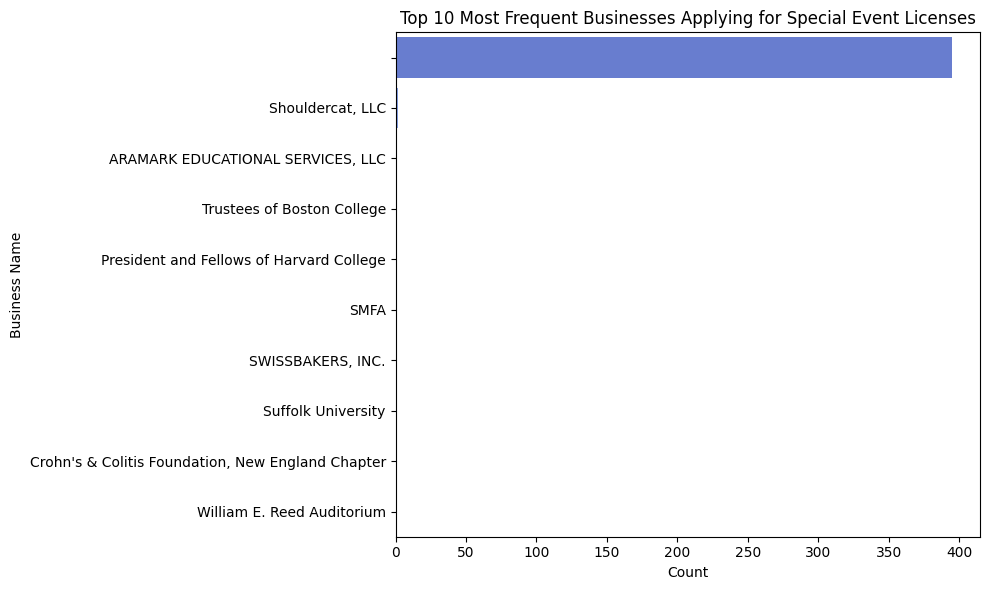

In [5]:
# Top 10 most frequent businesses
top_businesses = data['business_name'].value_counts().head(10)

# Plot the top 10 most frequent businesses
plt.figure(figsize=(10, 6))
sns.barplot(x=top_businesses.values, y=top_businesses.index, palette='coolwarm')
plt.title("Top 10 Most Frequent Businesses Applying for Special Event Licenses")
plt.xlabel("Count")
plt.ylabel("Business Name")
plt.tight_layout()
plt.show()


This code identifies and visualizes the top 10 cities where the most licenses have been issued:

Identifies the top 10 cities:
The value_counts() function counts the occurrences of each unique city in the city column.
head(10) retrieves the 10 cities with the highest counts.
Plots the licenses issued by city:
A bar plot is created using sns.barplot(), where:
The x-axis represents the city names.
The y-axis represents the count of licenses issued in each city.
The coolwarm color palette is applied for styling.


/var/folders/p1/2ml0fv9x7x79s1nnddt1_10h0000gn/T/ipykernel_6142/3019939129.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=licenses_by_city.index, y=licenses_by_city.values, palette='coolwarm')


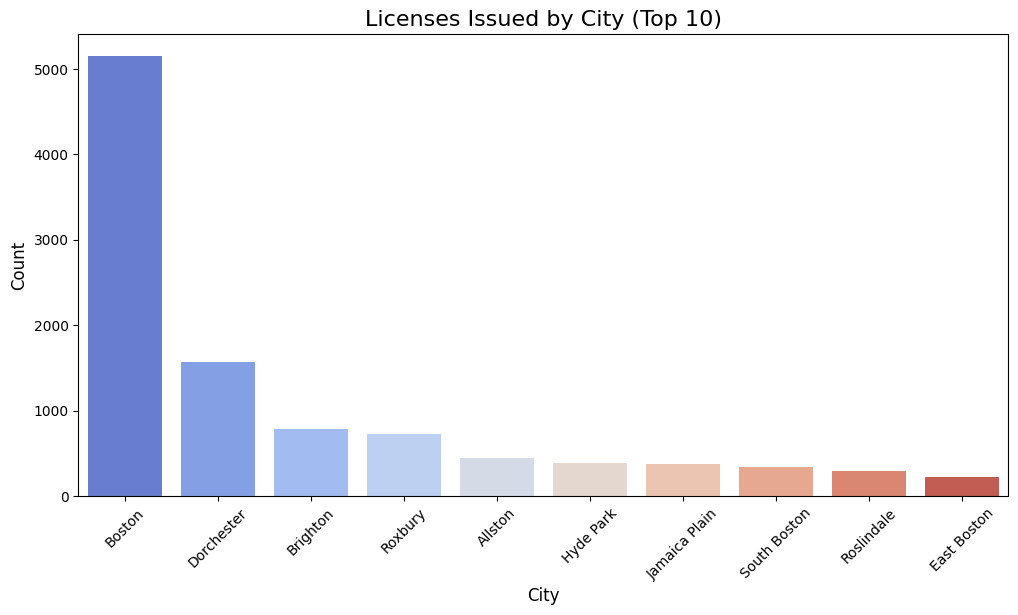

In [11]:
# Check for the most common cities
licenses_by_city = data['city'].value_counts().head(10)  # Top 10 cities

# Plot licenses issued by city
plt.figure(figsize=(12, 6))
sns.barplot(x=licenses_by_city.index, y=licenses_by_city.values, palette='coolwarm')
plt.title('Licenses Issued by City (Top 10)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


This code analyzes and visualizes the top 10 managers who have been issued the most licenses:

Identifies the top 10 managers:
The value_counts() function counts the number of licenses issued by each manager in the manager column.
head(10) is used to extract the top 10 managers with the most licenses.
Plots the data:
A horizontal bar plot is created using sns.barplot(), where:
The x-axis represents the number of licenses.
The y-axis represents the manager names.
The Blues_r color palette is applied to provide a gradient of blue hues.

/var/folders/p1/2ml0fv9x7x79s1nnddt1_10h0000gn/T/ipykernel_6142/3664992953.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=licenses_by_manager.values, y=licenses_by_manager.index, palette='Blues_r')


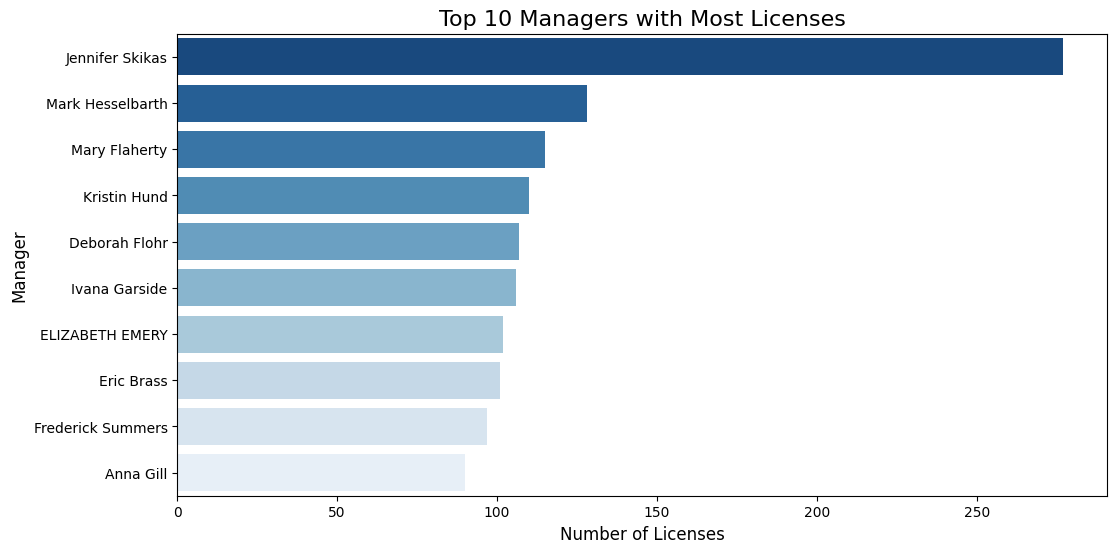

In [13]:
# Count licenses by manager
licenses_by_manager = data['manager'].value_counts().head(10)

# Plot the top 10 managers
plt.figure(figsize=(12, 6))
sns.barplot(x=licenses_by_manager.values, y=licenses_by_manager.index, palette='Blues_r')
plt.title('Top 10 Managers with Most Licenses', fontsize=16)
plt.xlabel('Number of Licenses', fontsize=12)
plt.ylabel('Manager', fontsize=12)
plt.show()


In [8]:
# List all column names to check for the correct column name
print(data.columns)


Index(['_id', 'license_num', 'historicallicensenum', 'license_type', 'issued',
       'expires', 'business_name', 'dba_name', 'comments', 'location_comments',
       'opening', 'closing', 'patronsout', 'capacity', 'applicant', 'manager',
       'day_phone', 'evening_phone', 'address', 'city', 'state', 'zip', 'gpsx',
       'gpsy', 'census tract', 'event_duration'],
      dtype='object')


This code calculates and visualizes the correlation between numeric columns in the dataset:

Selecting numeric columns:
data.select_dtypes(include=['float64', 'int64']) selects columns of numeric data types (float64 and int64), which are usually continuous variables.
Calculating correlations:
The corr() method is applied to compute the pairwise correlation of numeric columns, which measures how strongly variables are related to one another.
Creating a heatmap:
A heatmap is generated using sns.heatmap(), where:
annot=True displays the correlation coefficients within each cell of the heatmap.
cmap='coolwarm' sets the color palette for the heatmap, with warmer colors representing stronger positive correlations and cooler colors for stronger negative correlations.
fmt='.2f' formats the correlation values to two decimal places.

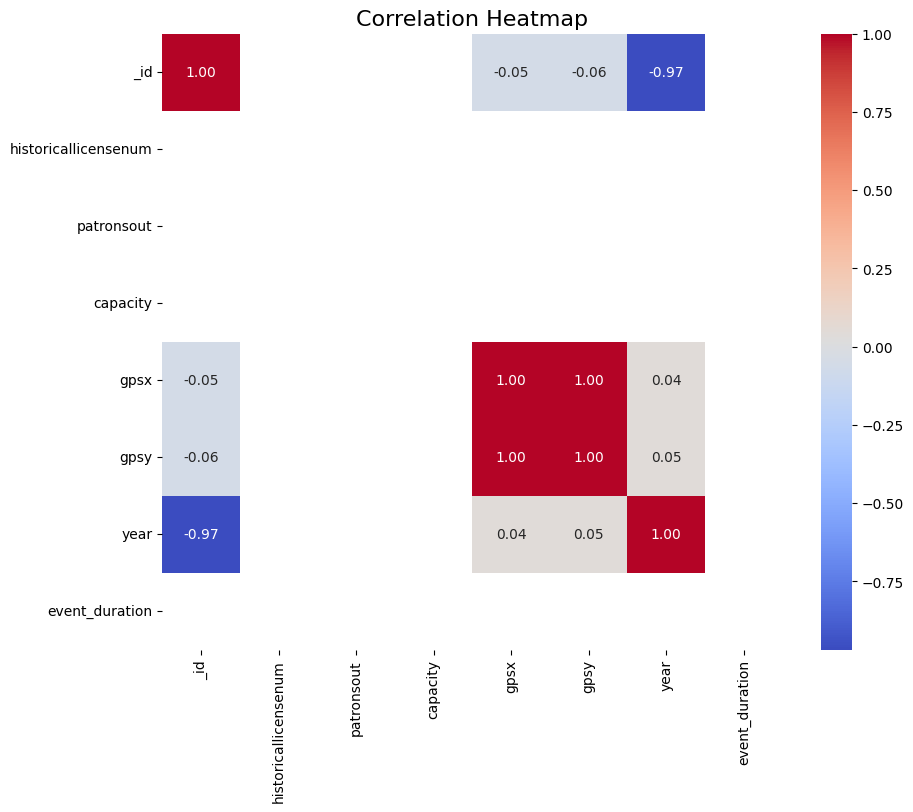

In [14]:
# Select numeric columns and calculate correlations
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Plot a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()
